In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import scipy.io as io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

In [75]:
data = io.loadmat('./Datos/P01.mat')

matriz = data['data']
print(matriz.shape)
print(len(matriz))   # x = epochs
print(len(matriz[0]))   # y = electrodos
print(len(matriz[0][0]))   # z = muestras 

(894, 256, 201)
894
256
201


In [3]:
electrodo8 = matriz[:,7,:]
print(electrodo8.shape)
print(electrodo8)

(894, 201)
[[ -1.89886281e-06  -1.00840373e-06   1.25017794e-06 ...,  -1.99776241e-05
   -1.88884188e-05  -1.71967869e-05]
 [ -4.72398852e-07  -6.27877221e-07  -1.48793420e-06 ...,  -4.96553432e-06
   -3.87947002e-06  -2.04118703e-06]
 [  6.30377343e-06   6.41721957e-06   6.73830393e-06 ...,   1.12358613e-05
    1.10880283e-05   9.89908993e-06]
 ..., 
 [ -1.08579175e-05  -1.06884899e-05  -1.05058022e-05 ...,  -1.88950742e-05
   -1.90880988e-05  -1.96135828e-05]
 [  5.97367336e-06   5.57200265e-06   5.13112625e-06 ...,   7.58558137e-06
    7.25155993e-06   6.95669955e-06]
 [  4.19202506e-08   1.75269527e-08   3.08250725e-07 ...,   1.90975674e-05
    1.96474922e-05   2.04587491e-05]]


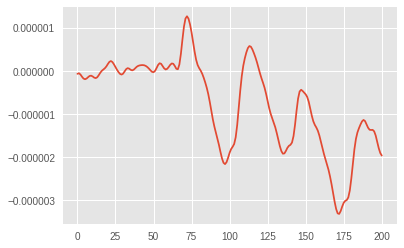

In [4]:
epoch_promedio = electrodo8.mean(axis=0)
plt.plot(epoch_promedio)

/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


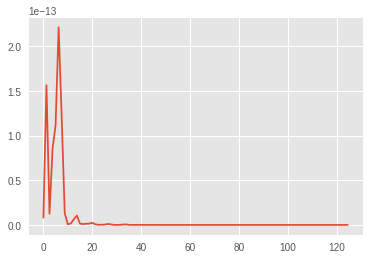

In [5]:
frec, power = signal.welch(x= epoch_promedio,fs = 250)
plt.plot(frec, power)

In [106]:
from matplotlib.colors import LogNorm


electrodo44 = matriz[:,43,:]
electrodo80 = matriz[:,79,:]
electrodo131 = matriz[:,130,:]
electrodo185 = matriz[:,184,:]

promedio = np.array(electrodo8)
promedio = np.array([electrodo8,electrodo44,electrodo80,electrodo131,electrodo185])
print(promedio.shape)

promedio = promedio.mean(axis=0)
print(promedio.shape)



welchs = {}
for i_epoch in range(len(promedio)):
#     t, p = signal.welch(electrodo8[i_epoch])
    welchs[i_epoch] = signal.welch(promedio[i_epoch])

#potencias = np.array([[np.array([f,p])] for (f,p) in welchs.values()])
freqs_pots = np.array([np.array([f,p]) for (f,p) in welchs.values()])
potencias = freqs_pots[:,1,:]
print(potencias.shape)



(5, 894, 201)
(894, 201)
(894, 101)


/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


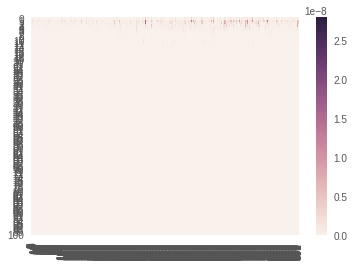

In [107]:
#sns.heatmap(potencias.T, norm=LogNorm(vmin=1.52064947e-17, vmax=1.14163442e-09))
sns.heatmap(potencias.T)

In [108]:
print(freqs_pots.shape)

(894, 2, 101)


(2, 101)
(101,)
(101,)


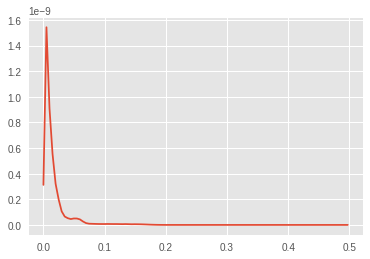

In [129]:
prom = np.mean(freqs_pots,axis=0)
print(prom.shape)
# print(prom)
freqs = prom[0]
pots= prom[1]
print(freqs.shape)
print(pots.shape)
plt.plot(freqs, pots)

(894, 201)


/home/julio/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


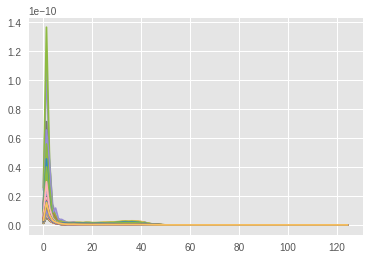

In [133]:
print(matriz[:,0,:].shape)

pots = np.zeros(101)

for i_elect in range(256):
    electrodo = matriz[:,i_elect,:]
    potsFINAL = np.zeros(101)
    for i_epoch in range(894):
        freq,power = signal.welch(x=electrodo[i_epoch,:],fs = 250)
        potsFINAL = np.sum([potsFINAL,power],axis=0)
    plt.plot(freq,np.divide(potsFINAL,894))
    pots = np.sum([pots,potsFINAL],axis=0)
    
plt.plot(freq,np.divide(pots,894*256))

#print(np.divide(pots,894))
       
        

In [ ]:
plt.sow()

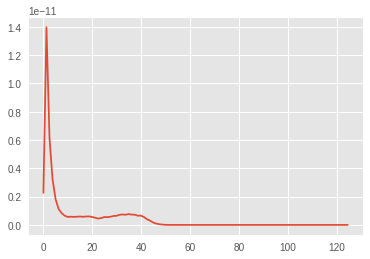

In [132]:
plt.plot(freq,np.divide(pots,894))

In [ ]:
plt.sow()